# Example usage for clustering in "movekit"

In [1]:
import movekit as mkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

/home/lukas/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


### Read in CSV file and preprocess

In [2]:
# Enter path to CSV file
path = "./datasets/fish-5.csv"

In [3]:
# Read in CSV file and preprocess
data = mkit.read_data(path)
preprocessed_data = mkit.preprocess(data)

Total number of missing values =  0
y            0
x            0
animal_id    0
time         0
dtype: int64


In [4]:
# converting positional data into scale, defined by user
mkit.convert_measueres(preprocessed_data, x_min = 0, x_max = 100, y_min = 0, y_max = 100).head()

,time,animal_id,x,y
0,1,312,49.663862,84.937627
1,1,511,44.688738,87.375033
2,1,607,47.555424,82.312218
3,1,811,55.281665,83.650358
4,1,905,44.134850,92.457755


### Detecting outliers
Function performs detection of outliers, based on user's criteria, regarding features, method and share of outliers.

In [5]:
# Extracting features for later use
feats = mkit.extract_features(preprocessed_data, fps = 1)

In [6]:
outs = mkit.outlier_detection(feats)

# printing all rows where outliers are present
outs[outs.loc[:,"outlier"] == 1]

,time,animal_id,outlier,x,y,distance,average_speed,average_acceleration,direction,stopped
4381,877,511,1,64.024072,7.887287,0.645740,0.645740,0.007075,-1.570202,0
4946,990,511,1,84.668724,35.864372,0.989962,0.989962,-0.016970,85.181662,0
4951,991,511,1,84.777247,36.784482,0.926487,0.926487,-0.063475,83.273314,0
4956,992,511,1,84.925232,37.660356,0.888287,0.888287,-0.038200,80.410027,0


In [7]:
# same function, different parameters
other_outs = mkit.outlier_detection(dataset = feats, features = ["average_speed", "average_acceleration"], contamination = 0.05, n_neighbors = 8, method = "median", metric = "euclidean")

# printing all rows where outliers are present
other_outs[other_outs.loc[:,"outlier"] == 1].head()

,time,animal_id,outlier,x,y,distance,average_speed,average_acceleration,direction,stopped
5,2,312,1,49.666681,84.851367,0.086306,0.086306,0.086306,-88.128385,1
8,2,811,1,55.328175,83.721136,0.084691,0.084691,0.084691,56.690149,1
233,47,811,1,54.657308,87.585154,0.071670,0.071670,0.051565,99.051314,1
1602,321,607,1,11.228560,83.442449,0.314210,0.314210,-0.068595,-170.682643,1
1852,371,607,1,3.330374,81.210741,0.108326,0.108326,-0.066402,-150.657411,1


### Group-level Analysis

Below we perform Analysis on Group-Level. This consists of:
- A dynamic time warping matrix, 
- A clustering over time based on absolute features,
- The heading difference of each animal with respect to the current centroid
- The group - polarization for each timestep. 

#### Obtain a matrix, based on dynamic time warping
Each Animal-ID is displayed in the indices, the entries reflect the euclidean distances of the animal's trajectories.

In [8]:
mkit.dtw_matrix(preprocessed_data)

,312,511,607,811,905
312,0.000000,5559.971244,5873.940640,8235.343344,7221.072340
511,5559.971244,0.000000,5119.824950,8667.471335,4258.767686
607,5874.377835,5119.822061,0.000000,7491.758830,7215.670756
811,8235.343344,8667.471335,7491.758830,0.000000,6826.692241
905,7221.068698,4258.767686,7215.670756,6826.692241,0.000000


#### Time series clustering for absolute features
Function can also be executed without extracted features, performing a standard feature-extraction before.

In [9]:
feats = mkit.extract_features(preprocessed_data)

In [10]:
mkit.ts_cluster(feats, 3).head(13)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,cluster,ClustCenter,centroid_distance,centroid_average_speed,centroid_average_acceleration,centroid_direction,centroid_stopped
0,1,312,49.663862,84.937627,0.000000,0.0,0.0,0.000000,0,2,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.0,0.0,0.000000,0.0
1,1,511,44.688738,87.375033,0.000000,0.0,0.0,0.000000,0,2,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.0,0.0,0.000000,0.0
2,1,607,47.555424,82.312218,0.000000,0.0,0.0,0.000000,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.0,0.0,0.000000,0.0
3,1,811,55.281665,83.650358,0.000000,0.0,0.0,0.000000,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.0,0.0,0.000000,0.0
4,1,905,44.134850,92.457755,0.000000,0.0,0.0,0.000000,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.0,0.0,0.000000,0.0
5,2,312,49.666681,84.851367,0.086306,0.0,0.0,-88.128385,0,2,"[0.04779586109497597, 0.0, 0.0, -7.90026924137...",0.047796,0.0,0.0,-7.900269,0.0
6,2,511,44.691556,87.383880,0.009285,0.0,0.0,72.327847,0,2,"[0.04779586109497597, 0.0, 0.0, -7.90026924137...",0.047796,0.0,0.0,-7.900269,0.0
7,2,607,47.544149,82.312218,0.011275,0.0,0.0,180.000000,0,1,"[0.011275069412135963, 0.0, 0.0, 180.0, 0.0]",0.011275,0.0,0.0,180.000000,0.0
8,2,811,55.328175,83.721136,0.084691,0.0,0.0,56.690149,0,0,"[0.05643951870851748, 0.0, 0.0, 118.3450743368...",0.056440,0.0,0.0,118.345074,0.0
9,2,905,44.106662,92.457755,0.028188,0.0,0.0,180.000000,0,0,"[0.05643951870851748, 0.0, 0.0, 118.3450743368...",0.056440,0.0,0.0,118.345074,0.0


#### Getting the heading difference
Calculate the difference in degrees between the animal's direction and the centroid's direction for each timestep. Stronger gain in y gives positive difference, weaker gain in y gives negative difference, since constant y is defined to be 0 degrees.

In [11]:
mkit.get_heading_difference(feats).head(13)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,x_centroid,y_centroid,medoid,distance_to_centroid,centroid_direction,heading_difference
0,1,312,49.663862,84.937627,0.000000,0.0,0.0,0.000000,0,48.265,86.147,312,1.849,NaN,NaN
1,1,511,44.688738,87.375033,0.000000,0.0,0.0,0.000000,0,48.265,86.147,312,3.781,NaN,NaN
2,1,607,47.555424,82.312218,0.000000,0.0,0.0,0.000000,0,48.265,86.147,312,3.900,NaN,NaN
3,1,811,55.281665,83.650358,0.000000,0.0,0.0,0.000000,0,48.265,86.147,312,7.448,NaN,NaN
4,1,905,44.134850,92.457755,0.000000,0.0,0.0,0.000000,0,48.265,86.147,312,7.542,NaN,NaN
5,2,312,49.666681,84.851367,0.086306,0.0,0.0,-88.128385,0,48.267,86.145,312,1.906,-45.000000,-43.128385
6,2,511,44.691556,87.383880,0.009285,0.0,0.0,72.327847,0,48.267,86.145,312,3.784,-45.000000,117.327847
7,2,607,47.544149,82.312218,0.011275,0.0,0.0,180.000000,0,48.267,86.145,312,3.900,-45.000000,-135.000000
8,2,811,55.328175,83.721136,0.084691,0.0,0.0,56.690149,0,48.267,86.145,312,7.466,-45.000000,101.690149
9,2,905,44.106662,92.457755,0.028188,0.0,0.0,180.000000,0,48.267,86.145,312,7.560,-45.000000,-135.000000


#### Computing polarization
Computing polarization of animals for each timestep. Value is between 0 and 1

In [12]:
mkit.compute_polarization(feats).head(13)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,polarization
0,1,312,49.663862,84.937627,0.000000,0.0,0.0,0.000000,0,1.000000
1,1,511,44.688738,87.375033,0.000000,0.0,0.0,0.000000,0,1.000000
2,1,607,47.555424,82.312218,0.000000,0.0,0.0,0.000000,0,1.000000
3,1,811,55.281665,83.650358,0.000000,0.0,0.0,0.000000,0,1.000000
4,1,905,44.134850,92.457755,0.000000,0.0,0.0,0.000000,0,1.000000
5,2,312,49.666681,84.851367,0.086306,0.0,0.0,-88.128385,0,0.341888
6,2,511,44.691556,87.383880,0.009285,0.0,0.0,72.327847,0,0.341888
7,2,607,47.544149,82.312218,0.011275,0.0,0.0,180.000000,0,0.341888
8,2,811,55.328175,83.721136,0.084691,0.0,0.0,56.690149,0,0.341888
9,2,905,44.106662,92.457755,0.028188,0.0,0.0,180.000000,0,0.341888


#### Producing a voronoi diagram
Each timestep gets a voronoi object as well as the area of the voronoi - shape. Infinity, if respective animal is outmost in swarm.

Voronoi object contains the following attributes:

`.points`
- Coordinates of input points.

`.vertices`
- Coordinates of the Voronoi vertices.

`ridge_points`
- Indices of the points between which each Voronoi ridge lies.

`ridge_vertices`
- Indices of the Voronoi vertices forming each Voronoi ridge.

`regions`
- Indices of the Voronoi vertices forming each Voronoi region. -1 indicates vertex outside the Voronoi diagram.

`point_region`
- Index of the Voronoi region for each input point. If qhull option “Qc” was not specified, the list will contain -1 for points that are not associated with a Voronoi region.

`furthest_site`
- True if this was a furthest site triangulation and False if not.



In [13]:
# Obtaining a dataframe with the voronoi area as well as a list of voronoi objects
vor_area, vor_objects = mkit.voronoi_diagram(preprocessed_data)

In [14]:
# Showing list of voronoi objects. using the properties above, one may compute quantities of interest.
vor_objects[0:5]

In [15]:
# Showing the first entries with the respective voronoi area
vor_area.head(13)

,time,animal_id,x,y,area_voronoi
0,1,312,49.663862,84.937627,49.458071
1,1,511,44.688738,87.375033,inf
2,1,607,47.555424,82.312218,inf
3,1,811,55.281665,83.650358,inf
4,1,905,44.134850,92.457755,inf
5,2,312,49.666681,84.851367,48.232874
6,2,511,44.691556,87.383880,inf
7,2,607,47.544149,82.312218,inf
8,2,811,55.328175,83.721136,inf
9,2,905,44.106662,92.457755,inf


#### Plotting exemplary voronoi diagram of 3rd timestep. 

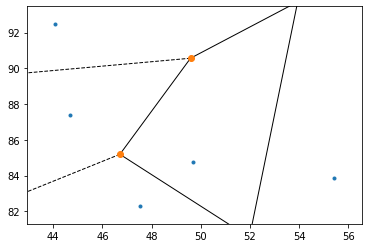

In [16]:
# This shows the voronoi plot for the 4th record in the captures-row
voronoi_plot_2d(vor_objects[3])
plt.show()